<a href="https://colab.research.google.com/github/junaidrahim/DES/blob/main/star_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skyfield

     |████████████████████████████████| 391 kB 4.3 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 258 kB 51.2 MB/s 
  Created wheel for skyfield: filename=skyfield-1.42-py3-none-any.whl size=436509 sha256=1f89c9cd90b5b7b7a7efc9a9ddb0f56843d8fc4b3cd36d08fd84baaacab4e40f
  Stored in directory: /root/.cache/pip/wheels/f8/37/bb/01a58b55ad1551ff4828713f195fd20c4c0a58f76504684727
  Created wheel for jplephem: filename=jplephem-2.17-py3-none-any.whl size=46328 sha256=43e976e3c9138ecd0d053821a5f2a0fccdd90be37135769e8f5c53ec1bbdf975
  Stored in directory: /root/.cache/pip/wheels/6c/fe/9c/2b3a1f7d639f9833f5cd79a2e62cb5d6f7901ee731e6cfd6e1
Successfully built skyfield jplephem


In [ ]:
from skyfield.api import Star, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

ts = load.timescale()
t = ts.now()

eph = load('de421.bsp')
earth = eph['earth']  

[#################################] 100% hip_main.dat
[#################################] 100% de421.bsp


In [ ]:
print(f'There are {len(df)} stars in the Hipparcos catalog ({hipparcos.URL}).')
limiting_magnitude = 5.0
df_lim = df[df['magnitude'] <= limiting_magnitude]
print(f'After filtering out stars dimmer than mag {limiting_magnitude}, there are {len(df_lim)}')
bright_stars = Star.from_dataframe(df_lim)
df_lim['magnitude'].min()

There are 118218 stars in the Hipparcos catalog (https://cdsarc.u-strasbg.fr/ftp/cats/I/239/hip_main.dat).
After filtering out stars dimmer than mag 5.0, there are 1627


-1.44

/usr/local/lib/python3.7/dist-packages/skyfield/functions.py:85: RuntimeWarning: invalid value encountered in remainder
  phi = arctan2(y, x) % tau


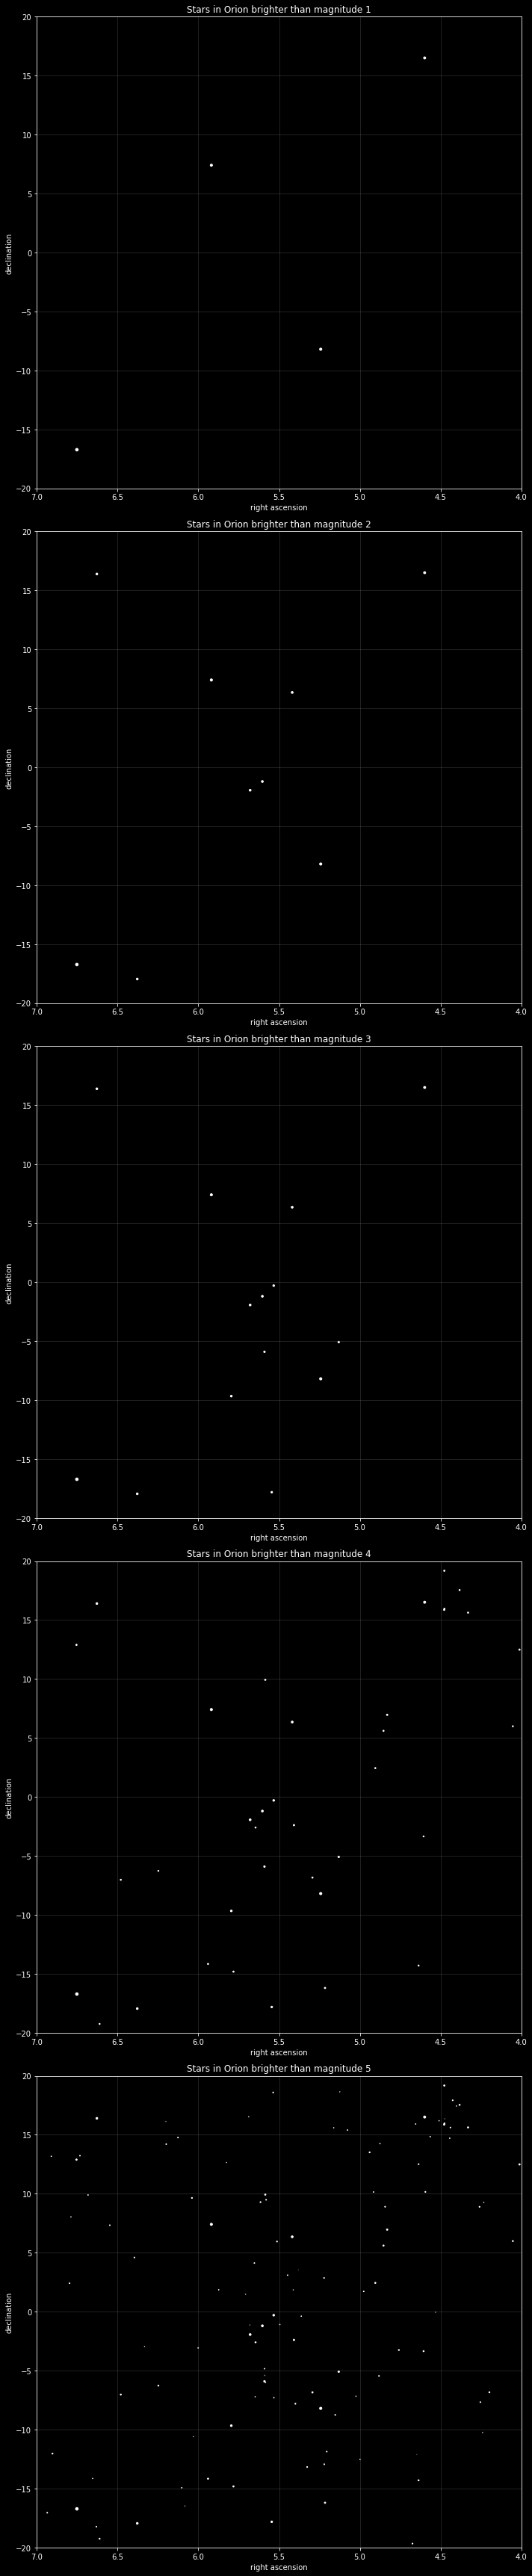

In [ ]:
fig, ax = plt.subplots(5, figsize=(10,48))
for mag in range(1,6):
  df_lim = df[df['magnitude'] <= mag]
  bright_stars = Star.from_dataframe(df_lim)
  astrometric = earth.at(t).observe(bright_stars)
  ra, dec, distance = astrometric.radec()
  ax[mag-1].scatter(ra.hours, dec.degrees, 2*(5-df_lim['magnitude']), 'w')
  ax[mag-1].set_xlim(7.0, 4.0)
  ax[mag-1].set_ylim(-20, 20)
  ax[mag-1].grid(color='gray', linestyle='-', linewidth=.5, alpha=.5)
  ax[mag-1].set(title=f'Stars in Orion brighter than magnitude {mag}')
  ax[mag-1].set_xlabel('right ascension')
  ax[mag-1].set_ylabel('declination')
plt.tight_layout()

fig.savefig(f'bright_stars_.png')